# S-R Trend Analysis with CovsirPhy

In [1]:
# imports 
import covsirphy as cs

C:\Users\Lupo\anaconda3\envs\Intro_to_Data_Science_20220419\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading the data -> stored in kaggle/input
# data will be downloaded if existing files are older than 24h
data_loader = cs.DataLoader(directory="kaggle/input")

# The number of cases and population values in jhu format
jhu_data = data_loader.jhu()

In [3]:
# scenario generation
snl = cs.Scenario(country="Switzerland", province=None)
snl.register(jhu_data)

# time period definition
snl.timepoints(first_date="03Mar2020", last_date="16Jul2020", today="16Jul2020")

In [4]:
# calculation of the recovery period over all countries
recovery_period = jhu_data.calculate_recovery_period()
print(f"Average recovery period: {recovery_period} [days]")

Average recovery period: 15 [days]


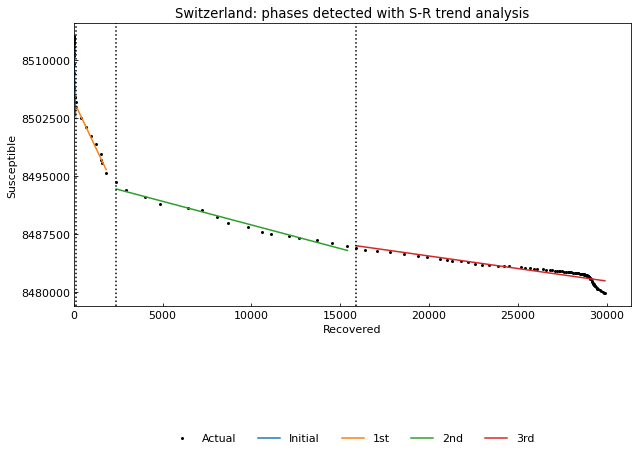

In [5]:
# phase detection
_ = snl.trend()

In [6]:
# Parameter estimation of the defined model
# Default value of timeout is 180 sec
snl.estimate(cs.SIRD)


<SIR-D model: parameter estimation>
Running optimization with 16 CPUs...
Completed optimization. Total: 0 min 12 sec


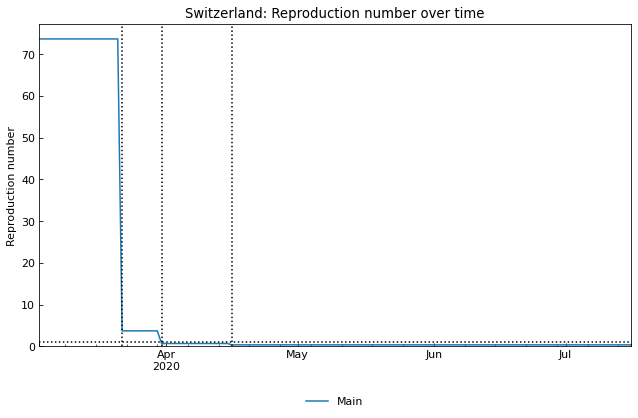

In [7]:
# R-value over the defined time period
_ = snl.history(target="Rt", )

In [8]:
snl.summary()

,Type,Start,End,Population,ODE,Rt,kappa,rho,sigma,1/alpha2 [day],tau,1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,03Mar2020,21Mar2020,8513227,SIR-D,73.62,0.002575,0.266456,0.001044,388,1440,3,957,0.210529,413,0 min 6 sec
1st,Past,22Mar2020,30Mar2020,8513227,SIR-D,3.69,0.003002,0.097118,0.023328,333,1440,10,42,0.101694,426,0 min 6 sec
2nd,Past,31Mar2020,15Apr2020,8513227,SIR-D,0.66,0.003690,0.042631,0.060846,271,1440,23,16,0.038455,498,0 min 7 sec
3rd,Past,16Apr2020,16Jul2020,8513227,SIR-D,0.34,0.002043,0.020076,0.056807,489,1440,49,17,0.479236,560,0 min 8 sec


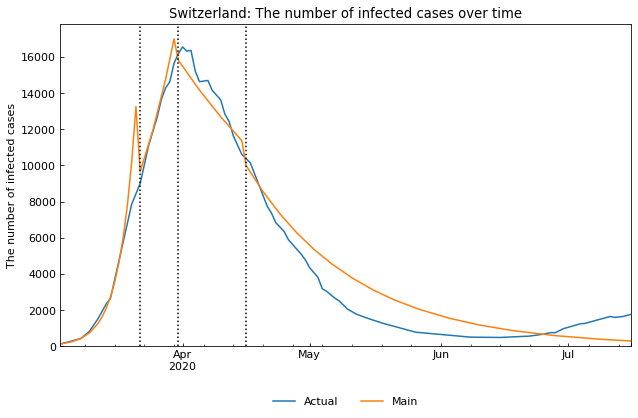

In [9]:
snl.history("Infected", phases=["0th", "1st", "2nd", "3rd"]);